# Objectif 


Dans ce projet on s'est interessé a l'analyse de la base de donnee de l'entreprise  IBM qu'on trouvé sur le site Kaggle https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset .Cette base de donnée décrit l'Attrition qui est une reduction imprévisible et incontrolable des employés de cette entreprise.

On s'est donné le but  d’identifier et de visualiser les
facteurs qui contribuent au départ incontrolé et imprévisibles des employés de l'entreprise IBM.

*   **Solutions Proposées :** Pour mieux repondre a la problematique on va diviser notre travail en sous partie
*   **Partie 1 :** Pre-processing des donnees

      *   Explication des variables
  
      *   Description des variables
  
      *   Nettoyage de la base <br><br>
  
                   
*   **Partie 2 :** Analyse exploratoire des donnees

      *   Hypothese 1 : Les célibataires ont tendances à quitter l’entreprise comparer à leur collègue mariée ou divorcée.
      
      *   Hypothese 2 : Les employées performant et impliquée ont tendance à quitter l’entreprise 
      
      *   Hypothese 3 : Les employées ayant travaillée dans plusieurs entreprises sont touchées par l’Attrition
      
      *   Hypothese 4 : Les employées ayant travaillée dans plusieurs entreprises sont touchées par l’Attrition

# Requis 

In [171]:
?pip install numpy
?pip install pandas
?pip install matplotlib
?pip install seaborn
?pip install plotly

Object `pip install numpy` not found.
Object `pip install pandas` not found.
Object `pip install matplotlib` not found.
Object `pip install seaborn` not found.
Object `pip install plotly` not found.


# Importation

  En premier lieu, afin d'analyser nos données, il faut importer différentes bibliothèques de pyhton, à savoir:

*   **matplotlib**, **seaborn**, **plotly.express**, **plotly.graph_objects** et **plotly.subplots** qui vont nous permettre de visualiser nos données (tracer des graphiques)

*  **pandas** qui va nous permettre la manipulation et l'analyse de nos données

* **numpy** permet d'effectuer des calculs numériques et introduit une gestion facilitée des tableaux de nombres           

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt  
import plotly.express as px 

# Pre - processing
Nous allons tout d'abord commencer par charger notre base de données

In [173]:
data=pd.read_excel(io="Base_projet.xlsx")

# Effectuer une copie de la base de données
data_init = data.copy()


## Description de la base

In [174]:
# Dimension de la base 
Dim = data_init.shape 
print("Nom de la base de données        : {}".format("Base_projet"))
print("Nombre de lignes                 : {}".format(Dim[0]))
print("Nombre de colonnes               : {}".format(Dim[1]))
print("Nombre de variable quantitative  : {}".format(data_init.select_dtypes(include=["object"]).shape[1]))
print("Nombre de variable qualitative   : {}".format(data_init.select_dtypes(include=["int64"]).shape[1]))

Nom de la base de données        : Base_projet
Nombre de lignes                 : 1470
Nombre de colonnes               : 34
Nombre de variable quantitative  : 16
Nombre de variable qualitative   : 18


### Definition des variables
#### Explication de chaque variable de notre base :


>**ATTRITION** ===> Employé quittant l'entreprise 

>**EMPLOYEE NUMBER** ===> Identifiant | **AGE** ===> Âge des employés <br>
>**OVER 18** ===> PLUS DE 18 ANS | **GENDER** ===> Genre de l'employe <br>
>**MARITAL STATUS** ===> Situation Marital <br>
>**NUMCOMPANIES WORKED** ===> Nombre d'entreprise dans lequelle l'employée à travaillée <br>


>**WORK LIFE BALANCE** ===> L'équilibre Travail-Vie <br> 
>**ENVIROMENT SATISFACTION** ===> Satisfaction environementale | **JOB SATISFACTION**  ===> Satisfaction Professionnelle <br>
>**RELATIONS SATISFACTION** ===> Satisfaction des relations humaines

>**BUSINESS TRAVEL** ===>Voyage d'affaire

>**DEPARTMENT** ===> DEPARTMENT de l'employe | **DISTANCE FROM HOME** ===>Distance du travail a la maison 


>**JOB ROLE**===> Poste occuper par l'employé | **JOB LEVEL** ===>Le niveau de travail <br>
>**JOB INVOLVEMENT** ===> Implication au travail | **OVERTIME** ===> Heures supplémentaire<br>

>**STANDARD HOURS** ===> Heure normale de travail| **TOTAL WORKING YEARS** ===> Nombre d'heures annuelle de travail

 
>**MONTHLY INCOME** ===> Revenu Mensuel | **MONTHY RATE** ==> Tarif mensuel <br>
>**HOURLY RATE** ===> Taux horaire|  **DAILY RATE** ===> Taux journalier <br> 
>**PERCENT SALARY HIKE** ===> Pourcentage d'augmentation de salaire <br> 


>**EDUCATION** ===> Niveau d'etude | **EDUCATION FIELD** ===> Domaine d'éducation <br>
>**TRAINING TIMES LAST YEAR**===> Durée de la formation de l'année dernière <br>


> **PERFORMANCE RATING** ===> NOTE DE PERFORMANCE <br>
> **STOCK OPTIONS LEVEL** ===> NIVEAU DES OPTIONS DE STOCK<br>


> **YEARS AT COMPANY** ===> ANCIENNETÉ <br>
> **YEARS IN CURRENT ROLE** ===> (NOMBRE D'ANNÉES DANS LA FONCTION ACTUELLE) <br> 
> **YEARS SINCE LAST PROMOTION** ===> ANNÉES DEPUIS LA DERNIÈRE PROMOTION <br>
> **YEARS WITH CURRENT MANAGER**  ===>  NOMBRE D'ANNÉES AVEC LE MANAGER ACTUEL


Dans la suite nous allons nettoyer la base de données pour de possible valeur manquant, doublon, ... etc

## Nettoyage de la base 

>### Valeurs Manquantes

In [175]:
Nbr_val_NA = data.isna().sum()          # Nombre de valeurs manquantes par colonne
Part_val_NA =  Nbr_val_NA / Dim[0]      # Pourcentage de valeur manquante par colonne
print("On a {} % de valeur manquante dans la base de données".format(Part_val_NA.sum()))

On a 0.0 % de valeur manquante dans la base de données


Il n'y aucune valeur manquantes dans cette base de données

>### Doublon

In [176]:
#somme des ligne duppliques
print("Le nombre de lignes dupliquée est : ",data.duplicated().sum())

Le nombre de lignes dupliquée est :  0


Nous n'avons pas de doublon dans cette base de données

>### Variable Constante

* StandardHours  <br>
La variable StandardHours représente l'heure de travail normal de chaque employé.

In [177]:
StandardHours = 80

# Test si les valeurs StandardHours sont differents de 80
# data.StandardHours[data.StandardHours != 80]

# Affiche les valeur unique de la variable StandardHours 
print ("Les différentes valeurs de la variable StandardHours : ", end="")
print (data_init.StandardHours.unique(), ".")


Les différentes valeurs de la variable StandardHours : [80] .



Cette variable ne varie pas et reste à 80 peu importe l'employé. <br>
De même pour la variable Over18 qui est toujours à la valeur 'Y'.

* Over18 <br>
  Cette variable indique si l'age des employés est supérieur à 18 ans. <br>
De même pour la variable Over18 qui est toujours à la valeur 'Y'

In [178]:
Over18 = 'Y'

# Test si les valeurs Over18 sont differents de Y
# data.Over18[data.Over18 != 'Y']

# Affiche les valeur unique de la variable Over18
print ("Les différentes valeurs de la variable Over18 : ", end="")
print(data_init.Over18.unique(), ".")

Les différentes valeurs de la variable Over18 : ['Y'] .


En guise de remarque on constate que la variable **Over18** n'a qu'une seule modalite donc on pourra la supprimmer.

 Par consequent on peut suprimer les variable **StandardHours** et **Over18** de la base de donnée 

In [179]:
# La methode drop avec l'argument columns sert à supprimer 
# les colonnes spécifié en liste
data_init = data_init.drop(columns=["StandardHours", "Over18"])

>### Séparation de la base 

Dans cette partie on se donne comme objectif de s'intérresser qu'à la base avec la modalite "**Yes**" de la variable cible qui est l'**Attrition**

In [180]:
# Base de donnée des employés quittant l'entreprise
Depart_df  = data_init[data_init['Attrition'] == 'Yes']
# Base de donnée des employés restant dans l'entreprise 
Restant_df = data_init[data_init['Attrition'] == 'No']

In [181]:
# Affichage du nombre d'employé dans ces bases
print("{} employés restent dans l'entreprise.".format(Depart_df.shape[0]))  
print("{} employés quittent l'entreprise.".format(Restant_df.shape[0]))

237 employés restent dans l'entreprise.
1233 employés quittent l'entreprise.


Ainsi notre base nommee **depart_df** comporte tous les employés qui ont quitter l'entreprise.
Elle a pour dimension **237** individus.

Dans la suite de nos analyses notre  base de référence sera **Depart_df**

In [182]:
Depart_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Excellent,Low,0,8,0,Bad,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Excellent,Medium,0,7,3,Better,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,Bachelor,Life Sciences,19,High,...,Excellent,Medium,0,6,4,Better,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,Master,Life Sciences,27,High,...,Outstanding,Medium,0,10,4,Better,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,Below College,Medical,31,Medium,...,Excellent,High,0,8,2,Better,4,2,1,3


## Resumé Statistique 

In [183]:
# Describe donne un resumée statistique des variable quantitative de la base de donnée
data_init.describe().round(2)

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,1024.87,65.89,2.06,6502.93,14313.10,2.69,15.21,0.79,11.28,2.80,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,602.02,20.33,1.11,4707.96,7117.79,2.50,3.66,0.85,7.78,1.29,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,30.00,1.00,1009.00,2094.00,0.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,491.25,48.00,1.00,2911.00,8047.00,1.00,12.00,0.00,6.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,1020.50,66.00,2.00,4919.00,14235.50,2.00,14.00,1.00,10.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,1555.75,83.75,3.00,8379.00,20461.50,4.00,18.00,1.00,15.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,2068.00,100.00,5.00,19999.00,26999.00,9.00,25.00,3.00,40.00,6.00,40.00,18.00,15.00,17.00


Ci-dessus on a une description des variables quantitative de la base de données. Nous avonc les métrique de base tels que le minimum, le maximum, la moyenne, l'ecart-type et les quartile. <br>
* les employée sont tous agés de plus de 18 ans
* Le salaire moyen des employées est de 6502.93	
* ...

Nous pouvons observées ci-dessous les diagramme en cercle presentant la repartition des emploée selon leurs genres, situation maritale, par role dans l'entreprise, ...

<function matplotlib.pyplot.show(close=None, block=None)>

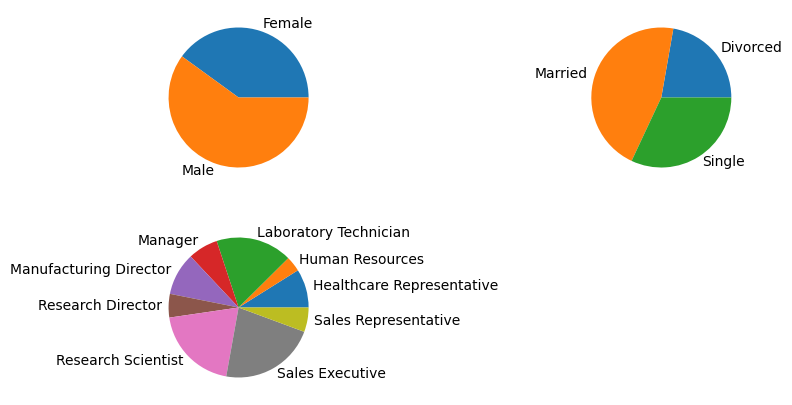

In [184]:
fig = plt.figure(figsize=(10, 5))

# Trace de la repartition des employés

plt.subplot(221)
# Par genre
df = data_init.groupby("Gender").size()
plt.pie(df, labels = df.index)

plt.subplot(222)
# Par Situation Marital
df = data_init.groupby("MaritalStatus").size()
plt.pie(df, labels = df.index)


plt.subplot(223)
# Par role occupé dans l'entreprise 
df = data_init.groupby("JobRole").size()
plt.pie(df, labels = df.index)
plt.show


# Analyse


## Hypothèse 1

**Les employés célibataires présentent la plus grande proportion de départs, par rapport à leurs collègues mariés ou divorcés?**

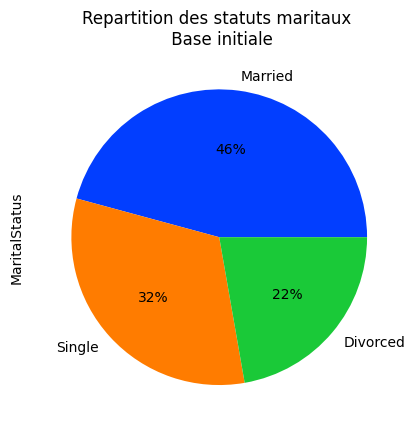

In [185]:
plt.figure()
couleurs =  sns.color_palette('bright')
data_init['MaritalStatus'].value_counts().plot(kind='pie',
                                          title="Repartition des statuts maritaux \n Base initiale",
                                          colors=couleurs, 
                                          autopct = '%0.0f%%')
plt.show()

Dans cette entreprise 46% des employés sont mariés, 22% sont divorcés et 32% sont célibataires

In [186]:

px.histogram(Depart_df 
             , x = "Attrition"
             , color= "MaritalStatus",
             title = "(Base d'attrition à 'Yes') Rapport aux statuts maritaux des employés", 
             text_auto=True
             )

In [187]:
Depart_df.MaritalStatus.value_counts()

Single      120
Married      84
Divorced     33
Name: MaritalStatus, dtype: int64

 Les employés célibataires présentent la plus grande proportion de départs, par rapport à leurs collègues mariés ou divorcés (120 depart d'employés celibataire contre 84 mariés et 33 de divorcés). Qu'est ce qui peut expliquer cela ? c'est que nous allons voir par la suite

### Taux de départ selon le statuts marital (%)

In [188]:
effectif_stat_mar= data_init.MaritalStatus.value_counts()
eff_total_celib = effectif_stat_mar["Single"]
print("Effectif total de célibataire : ", eff_total_celib)

print("Pour les célibataire          : ", end="")  
print(((120/eff_total_celib)*100).round(2), "%")

print("Pour les mariées              : ", end="")
print(((84/effectif_stat_mar["Married"])*100).round(2), "%")

print("Pour les divorcés             : ", end="")
print(((33/effectif_stat_mar['Divorced'])*100).round(2),"%")

Effectif total de célibataire :  470
Pour les célibataire          : 25.53 %
Pour les mariées              : 12.48 %
Pour les divorcés             : 10.09 %


### Les raisons qui expliquent leurs depart :

* **La satisfaction à l'environnement du travail**

In [189]:
df=Depart_df[Depart_df.EnvironmentSatisfaction=='Low']
px.histogram(df
             , x = "EnvironmentSatisfaction"
             , color= "MaritalStatus",
             barmode='group',
             title = "Niveau de satistifaction de l'employé par rapport à l'environnement social de l'entreprise",
             text_auto=True
             )

On remarque que les employés celibataires sont faiblement satisfaits de leurs environement de travail que leur collègues ce qui peut expliquer leurs nombreux depart par rapport a leurs collegue mariés et divorcé.

* **La satisfaction de relation entre salariés**

In [190]:
df_relationship=Depart_df[Depart_df.RelationshipSatisfaction=='Low']
px.histogram(df_relationship
             , x = "RelationshipSatisfaction"
             , color= "MaritalStatus",
             barmode='group',
             title = "Niveau de satisfaction de relation entre salariés",
             text_auto=True
             )

On constate que les employés celibataires sont nombreux à ne pas être satisfaits de leurs relations au travail par rapport à leurs collègues mariés et divorcés


### Conclusion 
On constate que la pluplart des salariés  qui quittent l'entreprise sont des celibataires, ils sont insatisfaits de leur environnement de travail et de leur relation avec leeurs collegues.

### Proposition de solution

Prosposition de Solution : Prioriser l’intégration des nouveaux membres d’équipe,Créer un environnement de travail confortable

## Hypothèse 2

**Les employées performant et impliquée ont tendance à quitter l’entreprise**

Pistes de solutions ?

Pour cela, nous allons analyser les variables catégorielles dites ici variables quantitatives :

**On s'intéresse à certaines variables qualitatives. Nous allons sélectionner quelques unes qui me paraissent plus pertinentes pour accréditer ou non notre hypothèse et expliquer pourquoi :**

**PS** : Parce que dans les variables qualitatives certaines variables sont essentiellement des variables de ressenti au travail. C'est important de les identifier car ces variables pourraient nous être utiles pour notre étude.

In [191]:
# Fonction pour faire des diagrammes en barre 
# Des colonnes de la base de donnée des employés qui quittent de l'entreprise
  
def barplot(nom_colonne):
    fig = px.histogram(Depart_df
                       , x = Depart_df[nom_colonne]
                       , template = 'plotly_dark'
                       , title = f'Distribution de l\'Attrition en fonction {nom_colonne}'
                       , text_auto = 'd3-format')
    fig.show()

In [192]:
#barplot('BusinessTravel')
#barplot('Gender')
#barplot('MaritalStatus')
barplot('Department')
barplot('Education')
barplot('EnvironmentSatisfaction')
barplot('EducationField')
barplot('JobInvolvement')
barplot('JobSatisfaction')
barplot('WorkLifeBalance')
barplot('PerformanceRating')
barplot('JobRole')
barplot('RelationshipSatisfaction')

D'abord, nous pouvons voir que la plupart des employés qui ont quitté ont travaillé dans le département Research et Development ( Recherche et Developpement ) avec pour la plupart des laboratory technicians, sales executives or research scientists

On peut remarquer que ces employés ont de très bons scores dans les notes de performances - cf performance rating. Ce n'est pas normal de perdre des employés avec de tels niveaux de performance.

La plupart ont le Bachelor et leur domaine d'etude pour la plupart Life Sciences, Medical and Marketing.

Ces employés pour la plupart sont très impliqués dans leur job ( job involvement ) et sont satisfaits de leur travail ainsi que de l'equilibre travail et loisir. Donc ou pourrait se trouver le probleme ?

En y regardant de plus près, nous remarquons la plupart est peu satisfait de l'environnement de travail ( work environment = low ). 

La question qui se pose pour ici pour le manager ( si tant est qu'il n'ait pas démissioné lui aussi ), c'est comment améliorer l'environnement de travail.  Quels changement doivent etre apportés en particulier pour le personnel du
département Research and Dévelopement ? Est-ce un problème de salaire qui est souvent la première variable à laquelle on pense ? Est-ce un problème d'équipement surtout pour ce type de département ?Est-ce un management trop rigide ?
La place de l'humain ? 

Nous avons regardé de plus près le coté management et pour cela nous avons tracé l'attrition en fonction du nombre d'années passées avec le manager actuel :



In [193]:
def numeric_plot(nom_colonne):
    fig = px.histogram(Depart_df
                       , x = Depart_df[nom_colonne]
                       , nbins  = 20, template = 'plotly_dark',
                      title = f'Distribution de l\'Attrition en fonction {nom_colonne}')
    fig.show()

In [194]:
Depart_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Excellent,Low,0,8,0,Bad,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Excellent,Medium,0,7,3,Better,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,Bachelor,Life Sciences,19,High,...,Excellent,Medium,0,6,4,Better,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,Master,Life Sciences,27,High,...,Outstanding,Medium,0,10,4,Better,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,Below College,Medical,31,Medium,...,Excellent,High,0,8,2,Better,4,2,1,3


In [195]:
numeric_plot('YearsWithCurrManager') 

Il est également curieux de voir que beaucoup de ces employés avaient moins de 2 ans de travail avec leur dernier manager. Cela nous rappelle le nombre d'employés qui ont dit que leur satisfaction à l'égard de l'environnement de travail était faible ( Satisfaction == Low ). Pourrions-nous avoir des problèmes avec certains managers ? Dans quelle mesure sont-ils formés pour gérer leurs équipes et les personnes qu'ils dirigent ? En tant qu'entreprise, faisons-nous de notre mieux pour assurer une bonne relation entre les managers et les équipes ?

<AxesSubplot: xlabel='EnvironmentSatisfaction'>

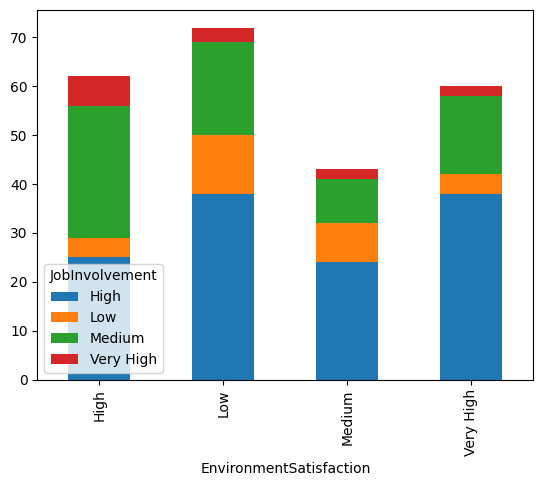

In [196]:
# barplot du tableau croisé entre EnvironmentSatisfaction et JobInvolvement
t = pd.crosstab(Depart_df.EnvironmentSatisfaction,Depart_df.JobInvolvement)
t.plot.bar(stacked = True)

En croisant l'implication au travail par rapport à l'appréciation de l'environnement de travail, nous pouvons remarquer que les employés partis et qui n'appréciaient pas l'environnement de travail avaient une implication très élevée.

In [197]:
df = Depart_df[(Depart_df.EnvironmentSatisfaction == 'Low') & (Depart_df.JobInvolvement =='High')]

In [198]:
px.histogram(df,x = 'YearsWithCurrManager', text_auto=True)

Par ailleurs, l'histogramme ci-dessus montre que la plupart est partie au bout de 3 ans avec leur ancien manager.

Conclusion : La plupart des employés partis au bout de trois ans avec leur ancien manager étaient très impliqués dans leur taches et peu satisfaits de leur environnement de travail.


Proposition de solution : Une idée intéressante serait d'améliorer la qualité du management parce que c'est un gros manque à gagner en terme de RH de perdre des employés qualifiés dans une période aussi courte.

Par ailleurs, l'entreprise pourrait insister pour fidéliser les employés sur les 3 premières années  par des mesures d'incitation ( hausse de salaire, avantages CSE, amélioration qualité équipement office,...)



### Perspective 
On aurait pu aller plus loin et regarder si les employés partis au bout de 3 ans avaient des hausses de salaires réguliers.

## Hypothèse 3

*  **Les employés qui ont déjà travaillé dans plusieurs
entreprises, auparavant, présentent - ils la plus grande proportion de
départs ?**

In [199]:
# Regroupons les employées par nombre de compagnies dans lequelles ils ont travaillé auparavant
Depart_df['NumCompaniesWorked_group'] = pd.cut(x=Depart_df['NumCompaniesWorked'], bins=[0, 2, 9],
                                     labels=['[0-2[', '[2-9]'])

C:\Users\okeco\AppData\Local\Temp\ipykernel_17664\2578370088.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



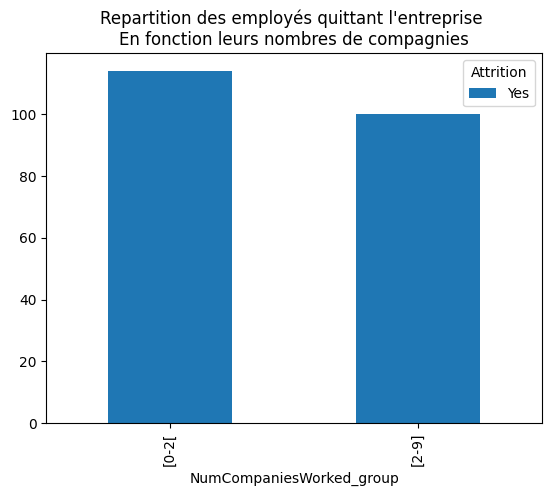

In [200]:
# Tableau croisé entre NumCompaniesWorked_group et Attrition
df_cross_tab = pd.crosstab(Depart_df.NumCompaniesWorked_group, Depart_df.Attrition)
df_cross_tab.plot.bar(stacked = True)

plt.title("Repartition des employés quittant l'entreprise \nEn fonction leurs nombres de compagnies")
plt.show()

On constate que les employes qui n'ont pas travailés dans plusieurs entreprises presentent la plus grande proportion de départ.

Notre hypothèse n'est donc pas vérifiée.

Maintenant cherchons à comprendre la raison:

Text(0.5, 1.0, 'Repartition du status marital des employes  \n En fonction leurs nombres de compagnies')

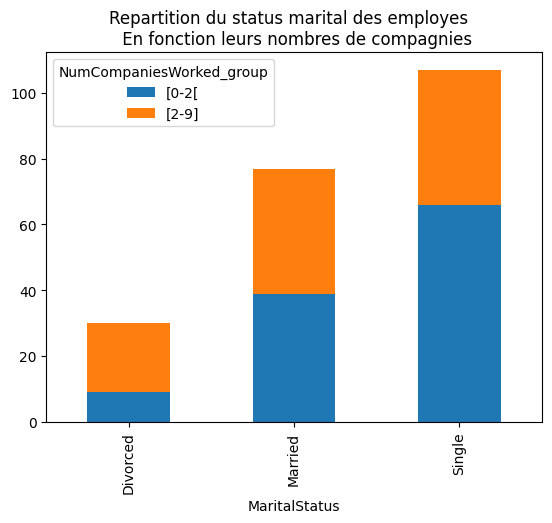

In [201]:
df_cross_tab = pd.crosstab(Depart_df.MaritalStatus ,Depart_df.NumCompaniesWorked_group )
df_cross_tab.plot.bar(stacked = True)
plt.title("Repartition du status marital des employes  \n En fonction leurs nombres de compagnies")

Dans l'hypothèse 1 on a remarqué que la plus grande proportion de départ était des célibataires et on remarque que la majorité des employés qui ont fait moins de deux entreprise sont des célibataire donc on pouvait s'y attendre.

## Hypothèse 4

**Les employés loyaux, bénéficiant de salaires très
élevés et de beaucoup de responsabilités, affichent une proportion
de départs plus faible que leurs collègues.**

### Employé loyaux
On peut supposer que les employés loyaux sont:

* Ceux qui sont dans l'entreprise depuis plus de 10 ans et qui ont de bonne relation avec les employés.

In [202]:
df = Depart_df.assign(
    Loyal = Depart_df.apply
        (lambda emp : 'loyal' if (emp.YearsAtCompany >= 10) and (emp.RelationshipSatisfaction == "High") else "Autres", axis=1))
df.Loyal.unique()

print("Nous avons donc ", df.shape[0], " employés que l'on peut considéré comme loyaux.")

Nous avons donc  237  employés que l'on peut considéré comme loyaux.


Observons la repartition des employés quittant l'entreprise avec la supposition précédente

In [203]:
trace = go.Pie(values=df.Loyal.value_counts(), 
                labels = ["Employé loyal", 
                          "Autre employé"])
chart = [trace]
fig = go.Figure(chart)
fig.show()

On remarque que les employés quittant l'entreprise avec cette supposition represente la plus grande partie des employée quittant l'entreprise.

Ajoutons la condition du salaire pour observer à nouveau cette repartition

In [169]:
df_salaire_el = df[(df.MonthlyIncome > data_init.MonthlyIncome.mean()) | (df.Loyal == "Autre")]

Et en faisant une repartition de ces employés par rapport au JobRole 

In [204]:
px.histogram(data_frame= df_salaire_el, 
             x = 'JobRole',
             color = "Loyal"
             )

L'hypothèse est vérifiée car le nombre d'employés loyaux ayant une grande responsabilité et un salaire élevé représentent une proportion négligeable des employés quittant l'entreprise.